In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Codebase_AGWittmann/code-base/beamtime/')
import plot_SNVM_data as pSd
import SNVM_B_xyz_extraction as Sdp
from math import ceil

import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar
from math import ceil,floor,pi
import colorsys
import cv2
from skimage.util.shape import view_as_blocks
from skimage.io import imsave
from skimage.measure import profile_line
import scipy.ndimage

In [11]:
foldername = '/home/julisko/Seafile/My Library/Mumax/Mumax_Files/DyIG/180deg_DW_for_diff_NVprojections.out/'
filename = '/demag_180degDW.csv' #512,4,256
#filename = '/regions000000.csv' #512,4,256
#filename = '/180degDW_geom.csv' #512,4,256
pathname  = foldername+filename

In [12]:
#read file

file_df = pd.read_csv(pathname, header=None)
#print(file_df.shape,'\n',file_df)
x_shape = int(512)
y_shape = int(1)
z_shape = int(256)
data = file_df.to_numpy()
data = data.reshape((3,z_shape,y_shape,x_shape))
#data = data.reshape((z_shape,y_shape,x_shape)) # for regions file
data_yavg = np.average(data, axis = 2) #avg in y direction
#print(data.shape, data)
demag_x = data[0]
demag_y = data[1]
demag_z = data[2]

demag_x_yavg = data_yavg[0]
demag_y_yavg = data_yavg[1]
demag_z_yavg = data_yavg[2]


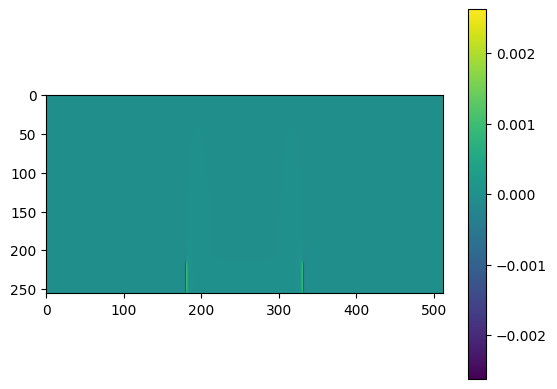

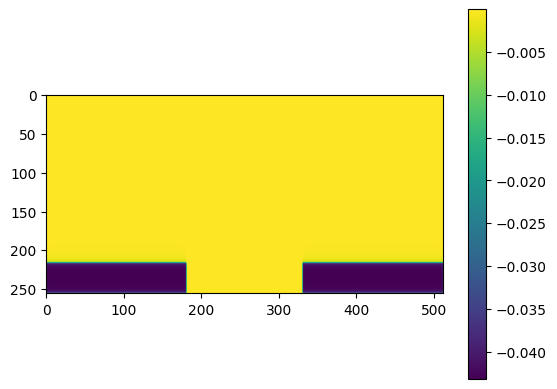

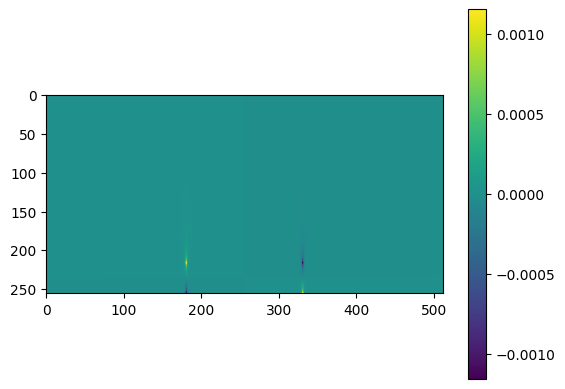

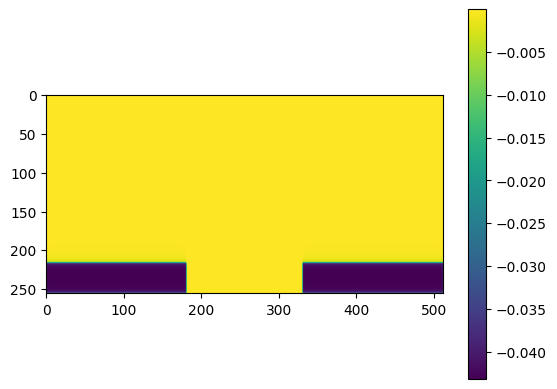

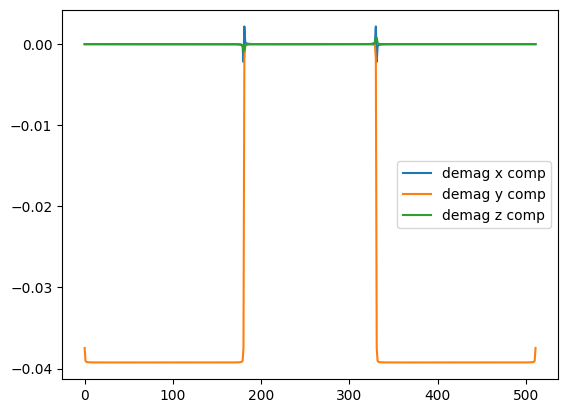

In [13]:
# define params for projection

liftheight = int(1)

theta_NV = 90
phi_NV = 90

plotstart_px = 0#int(150)
plotend_px = 512#int(360)

# project onto NV axis

theta_NV_rad = np.radians(theta_NV)
phi_NV_rad = np.radians(phi_NV)

demag_proj = demag_x * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z * np.cos(theta_NV_rad)
demag_proj_yavg = demag_x_yavg * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y_yavg * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z_yavg * np.cos(theta_NV_rad)

# plot results

#plt.imshow(data[:,int(y_shape/2),plotstart_px:plotend_px])

im = plt.imshow(demag_x[::-1,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.show()

im = plt.imshow(demag_y[::-1,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.show()

im = plt.imshow(demag_z[::-1,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.show()

im = plt.imshow(demag_proj[::-1,int(y_shape/2),:])#,vmin = -0.0001, vmax = 0.0001)
cb=plt.colorbar(im)
plt.show()


plt.plot(demag_x[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag x comp')
plt.plot(demag_y[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag y comp')
plt.plot(demag_z[liftheight,int(y_shape/2),plotstart_px:plotend_px],label='demag z comp')
#plt.plot(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'demag proj onto $\varphi=$'+str(phi_NV))
plt.legend()
plt.show()



[  0  45  90 135 180]


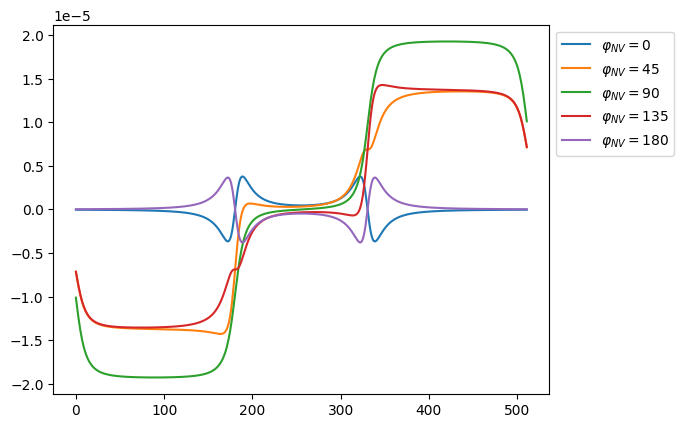

[180, 189, 255, 321, 180]


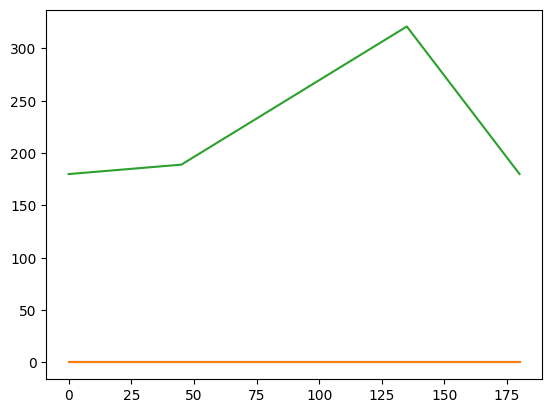

In [10]:
# define params for projection

liftheight = 139

plotstart_px = 0#180
plotend_px = 512#350

theta_NV = 90
phi_start = 0
phi_end = 180
phi_steps = 45

# project onto different phi rotations of NV axis

phis = np.arange(phi_start,phi_end+phi_steps,phi_steps)
print(phis)

demag_projs = np.zeros((len(phis),(plotend_px-plotstart_px)))

maxs = []
mins = []
zero_crossings = []

zero_temp = 0
max_temp = 0

theta_NV_rad = np.radians(theta_NV)

for phi_NV in phis:
    phi_NV_rad = np.radians(phi_NV)
    
    demag_proj = demag_x * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z * np.cos(theta_NV_rad)
    demag_proj_yavg = demag_x_yavg * np.sin(theta_NV_rad)*np.cos(phi_NV_rad) + demag_y_yavg * np.sin(theta_NV_rad) * np.sin(phi_NV_rad) + demag_z_yavg * np.cos(theta_NV_rad)

    index = int(np.where(phis == phi_NV)[0][0])
    max_temp = np.max(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])
    min_temp = np.min(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])
    zero_temp_arrform = np.where(np.diff(np.sign(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px])))
    if np.size(zero_temp_arrform) == 0:
        zero_temp = 0
    else:
        zero_temp = (zero_temp_arrform[0][0])
    maxs.append(max_temp)
    mins.append(min_temp)
    zero_crossings.append((zero_temp))

    demag_projs[index] = demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px]
    plt.plot(demag_proj[liftheight,int(y_shape/2),plotstart_px:plotend_px],label=r'$\varphi_{NV}=$'+str(phi_NV))

plt.legend(bbox_to_anchor = (1,1))
plt.show()

#plt.imshow(demag_projs[:,:].transpose())
#plt.show()

plt.plot(phis,maxs)
plt.plot(phis,mins)
#plt.show()

maxdist = (zero_crossings-np.nanmean(zero_crossings))
print(zero_crossings)
plt.plot(phis,np.array(zero_crossings))#/np.nanmax(zero_crossings)*2*np.nanmax(maxs)-np.nanmax(maxs))
plt.show()
